# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Part I: Data Validation

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

product_sales = pd.read_csv('product_sales.csv')
product_sales.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [51]:
df = product_sales.copy()

This project is part of the practical exam to receive a professional data analytics certificate from DataCamp.

The following questions will be answered:

- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

![Screenshot 2025-04-04 at 10.20.13](Screenshot%202025-04-04%20at%2010.20.13.png)


## 1. Checking Data

In [52]:
# Checking for missing values and finding the data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


==> We can see there are some missing values from the revenue column!

In [53]:
# 1. Checking missing values
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

==> As suspected, there are 1074 missing values in the revenue column!

In [54]:
# 2. Data validation: Checking unique values to identify unexpected or erroneous data
df.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

==> Under the sales_method column we see 5 different methods when we should have 3 type of methods

In [55]:
# 3. Check outlier: Using summary statistics such as mean, median,standard deviation, and quartiles, we can identify outliers in numeric columns.
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


==> There are outliers in years_as_customer, we know this because the company was founded in 1984 and is is not possible to have customers since 63 years ago

In [56]:
# Proportion of missing values relative to the total entries in the revenue column
(df['revenue'].isna().sum()/df['revenue'].count())*100

7.7121930202498925

More than 5% of missing values are from the revenue column, so we can not easily drop them unless we examine randomness of missing values. If they are missing completely at random (MCAR) or missing at random (MAR), dropping them may be less problematic. However, if they are missing not at random (MNAR), dropping them could introduce bias.

## 2. Handling Data

**a. Handling unique values: sale_method column**

In [57]:
# We should have 3 unique values in sales_method column. 
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [58]:
# Standardize the values in the 'sales_method' column by replacing 'em + call' with 'Email + Call' and 'email' with 'Email'
# Create a copy of the original DataFrame
df_corrected = df.copy()

# Replace values in the 'sales_method' column
df_corrected['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

# Check the unique values in the 'sales_method' column after replacement
unique_sales_method = df_corrected['sales_method'].unique()
print("Unique values in the sales_method column after replacement:", unique_sales_method)

Unique values in the sales_method column after replacement: ['Email' 'Email + Call' 'Call']


**b. Handling outliers: year_as_customer**

In [59]:
# Values greater than 40 in years_as_customer are wrong and we should consider them as outliers
df_corrected[df_corrected['years_as_customer']>40]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [60]:
# There are only two records as years_as_customer outliers, so we can easily drop them.
# Filter records where 'years_as_customer' is less than or equal to 40
df_filtered = df_corrected[df_corrected['years_as_customer'] <= 40]

# Check the number of records before and after filtering
print("Number of records before filtering:", len(df_corrected))
print("Number of records after filtering:", len(df_filtered))

Number of records before filtering: 15000
Number of records after filtering: 14998


**c. Handling missing values: revenue colum**n

==> To conduct a statistical test to determine if there is a relationship between missing values in the 'revenue' column and the 'sales_method' column, we can use a chi-square test of independence. This test is appropriate when both variables are categorical, so we first create a categorical revenue column.

In [61]:
# Replace NaN values with "Null" and non-NaN values with "Not_Null"
df_filtered['revenue_category'] = df_filtered['revenue'].fillna('Null').map(lambda x: 'Not_Null' if x != 'Null' else x)

# Check the unique values in the 'revenue_category' column
unique_revenue_category = df_filtered['revenue_category'].unique()
print("Unique values in the revenue_category column:", unique_revenue_category)

Unique values in the revenue_category column: ['Null' 'Not_Null']


In [62]:
df_filtered.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,revenue_category
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona,Null
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,Not_Null
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,Not_Null
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana,Null
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,Not_Null


==> To conduct a chi-square test of independence between the 'sales_method' and 'revenue_category' columns, we first need to create a contingency table representing the frequencies of each combination of categories. Then, we can use the chi2_contingency function from the scipy.stats module to perform the test.

In [63]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['sales_method'], df_filtered['revenue_category'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("\nChi-square statistic:", chi2)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("\nThere is a significant relationship between 'sales_method' and 'revenue_category'.")
else:
    print("\nThere is no significant relationship between 'sales_method' and 'revenue_category'.")

Contingency Table:
revenue_category  Not_Null  Null
sales_method                    
Call                  4780   181
Email                 6921   544
Email + Call          2223   349

Chi-square statistic: 251.11783987671868
p-value: 2.954295391738752e-55

There is a significant relationship between 'sales_method' and 'revenue_category'.


==> Because there is a significant relationship between 'sales_method' and 'revenue_category', we can not easily drop missing values. In such cases, simply dropping missing values may introduce bias into your analysis.

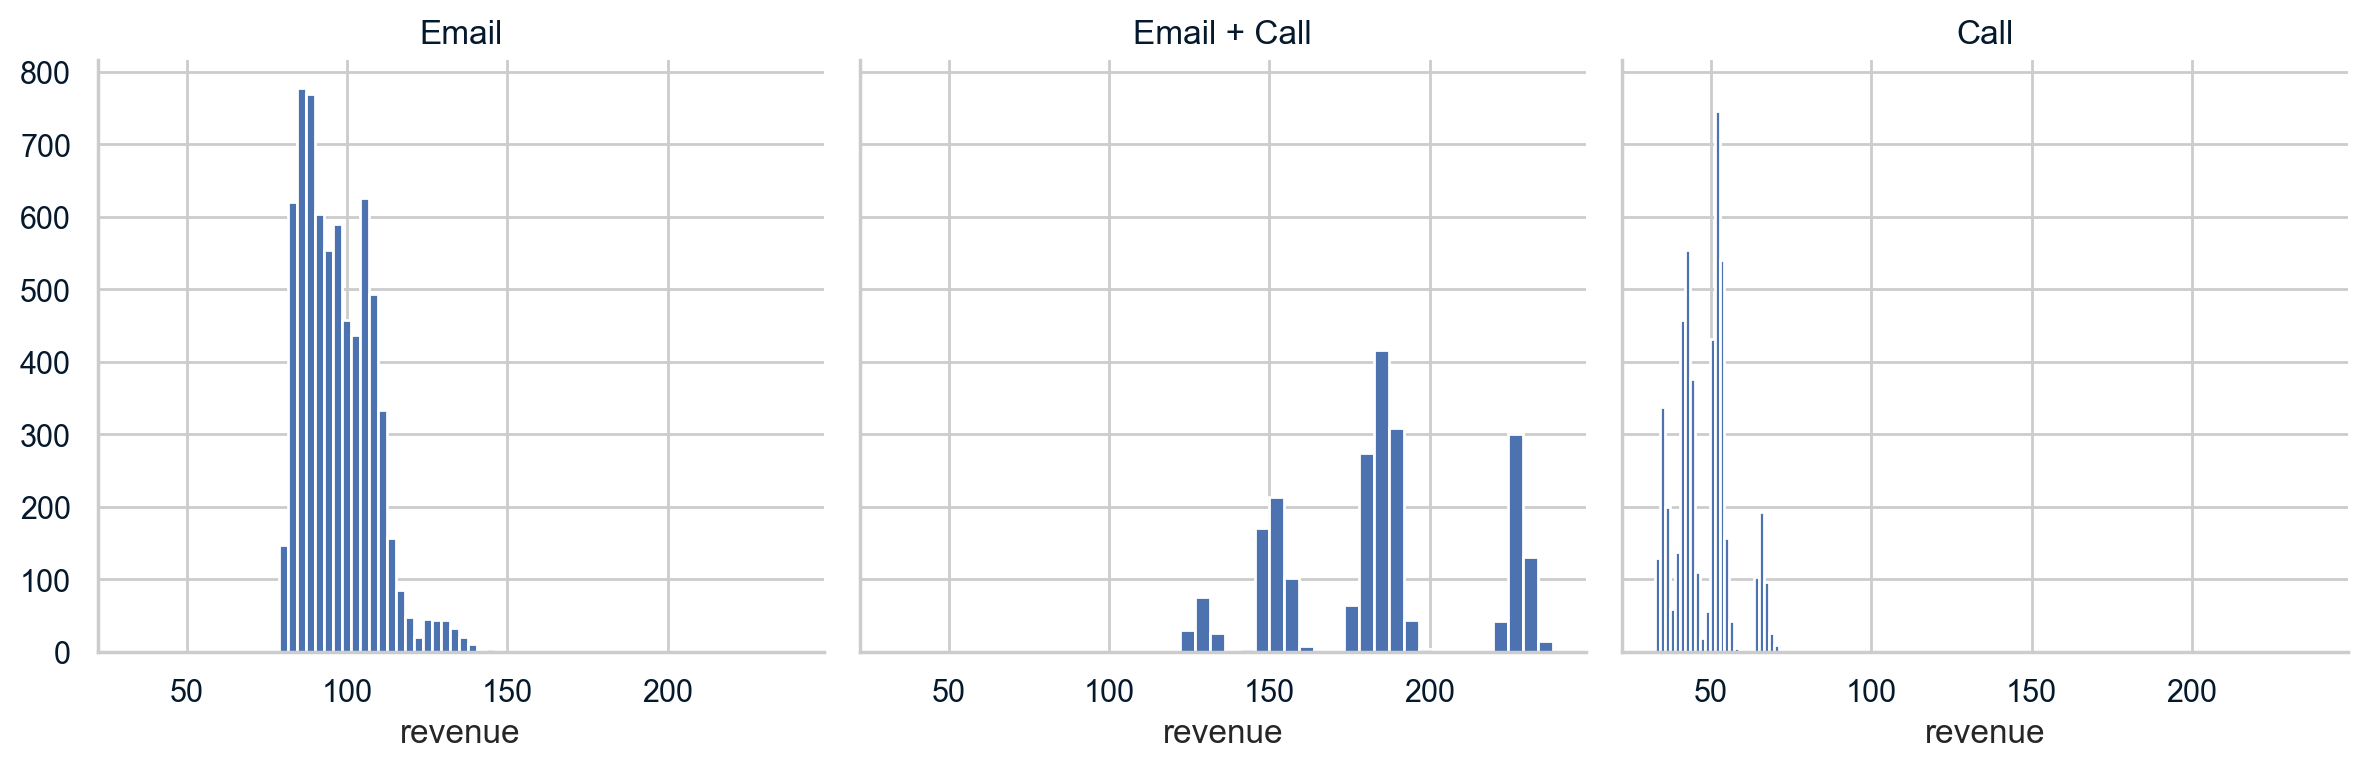

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a facet grid using seaborn
g = sns.FacetGrid(df_filtered, col="sales_method", col_wrap=3, height=4)

# Map a histogram for 'revenue' onto the grid
g.map(plt.hist, "revenue", bins=25)

# Add titles
g.set_titles("{col_name}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

==> When the distribution of revenue for each sales method is not normal, it is generally advisable to use the median for imputation rather than the mean


In [65]:
# Function to perform stratified imputation
def stratified_imputation(group):
    # Calculate median of 'revenue' within each group
    median_revenue = group['revenue'].median()
    # Impute missing values with the median within each group
    group['revenue'] = group['revenue'].fillna(median_revenue)
    
    return group

# Group the DataFrame by 'sales_method' and apply stratified imputation
df_imputed = df_filtered.groupby('sales_method').apply(stratified_imputation)

# Check if there are still any missing values in 'revenue' column
missing_values = df_imputed['revenue'].isnull().sum()
print("Number of missing values after imputation:", missing_values)

Number of missing values after imputation: 0


In [66]:
df = df_imputed.reset_index()

In [67]:
df.head(15)

,index,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,revenue_category
0,0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,95.58,0,24,Arizona,Null
1,1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,Not_Null
2,2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,Not_Null
3,3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,95.58,3,25,Indiana,Null
4,4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,Not_Null
5,5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi,Not_Null
6,6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia,Not_Null
7,7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma,Not_Null
8,8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts,Not_Null
9,9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri,Not_Null


# PART 2: Exploratory Analysis

To answer the questions, an exploratory analysis was conducted using various graphical and descriptive methods.

In [68]:
eda = df.copy()

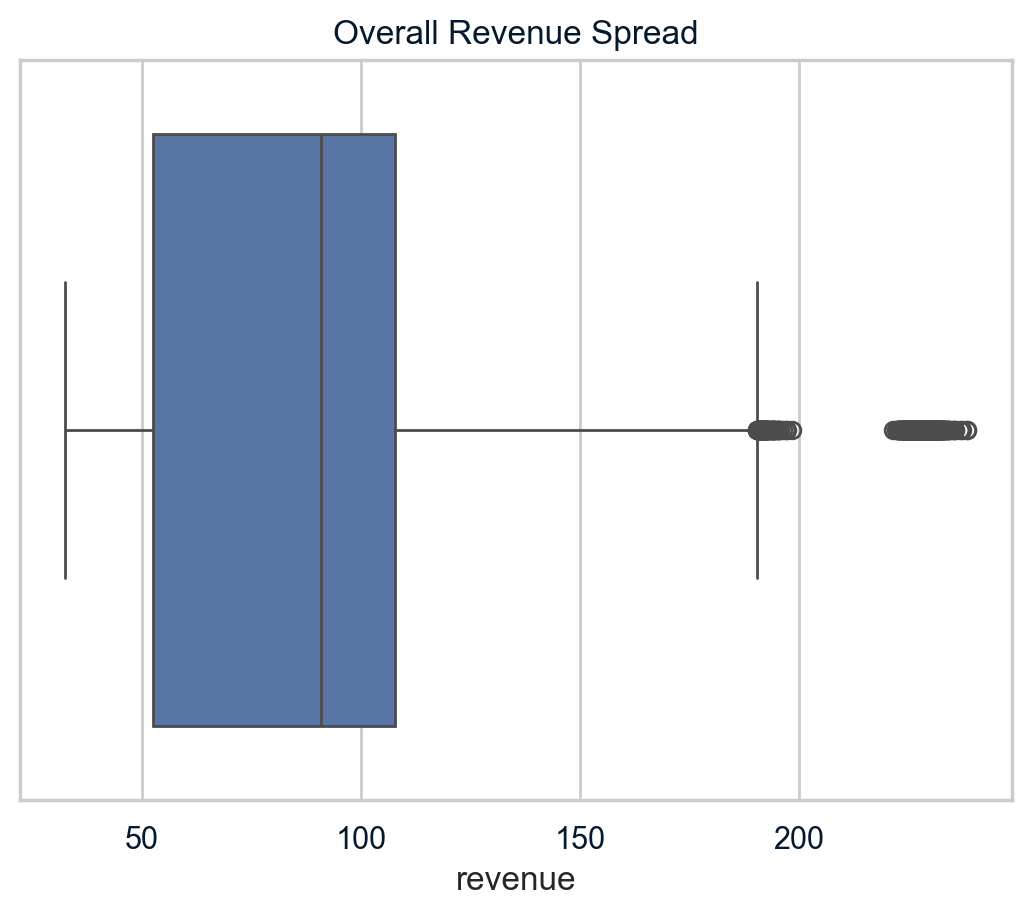

In [69]:
# Overall Revenue Method
sns.boxplot(data = eda, x = 'revenue')
plt.title('Overall Revenue Spread')
plt.xlabel('revenue')
plt.show()

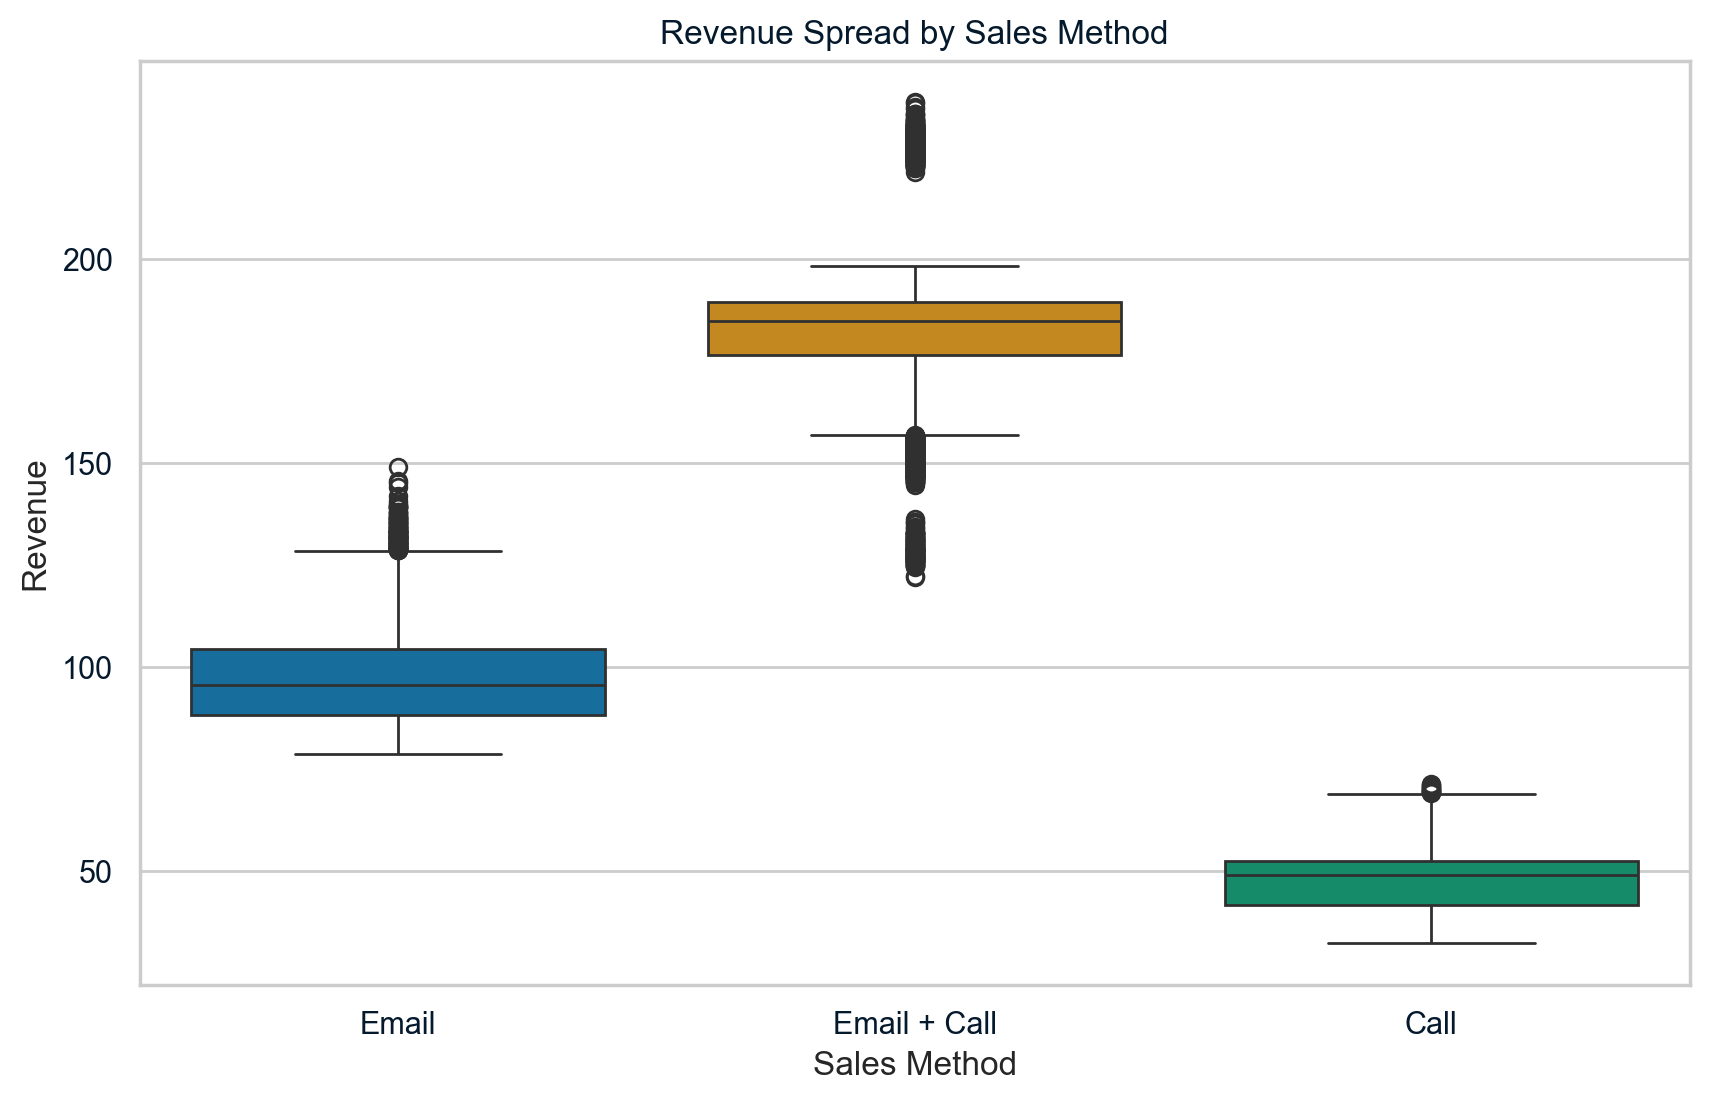

In [70]:
# Revenue spread for each sales method
plt.figure(figsize= (10,6))
sns.boxplot(data = eda, x ='sales_method', y = 'revenue', hue = 'sales_method',palette='colorblind')
plt.title('Revenue Spread by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

sales_method
Call             49.05
Email            95.58
Email + Call    184.74
Name: revenue, dtype: float64


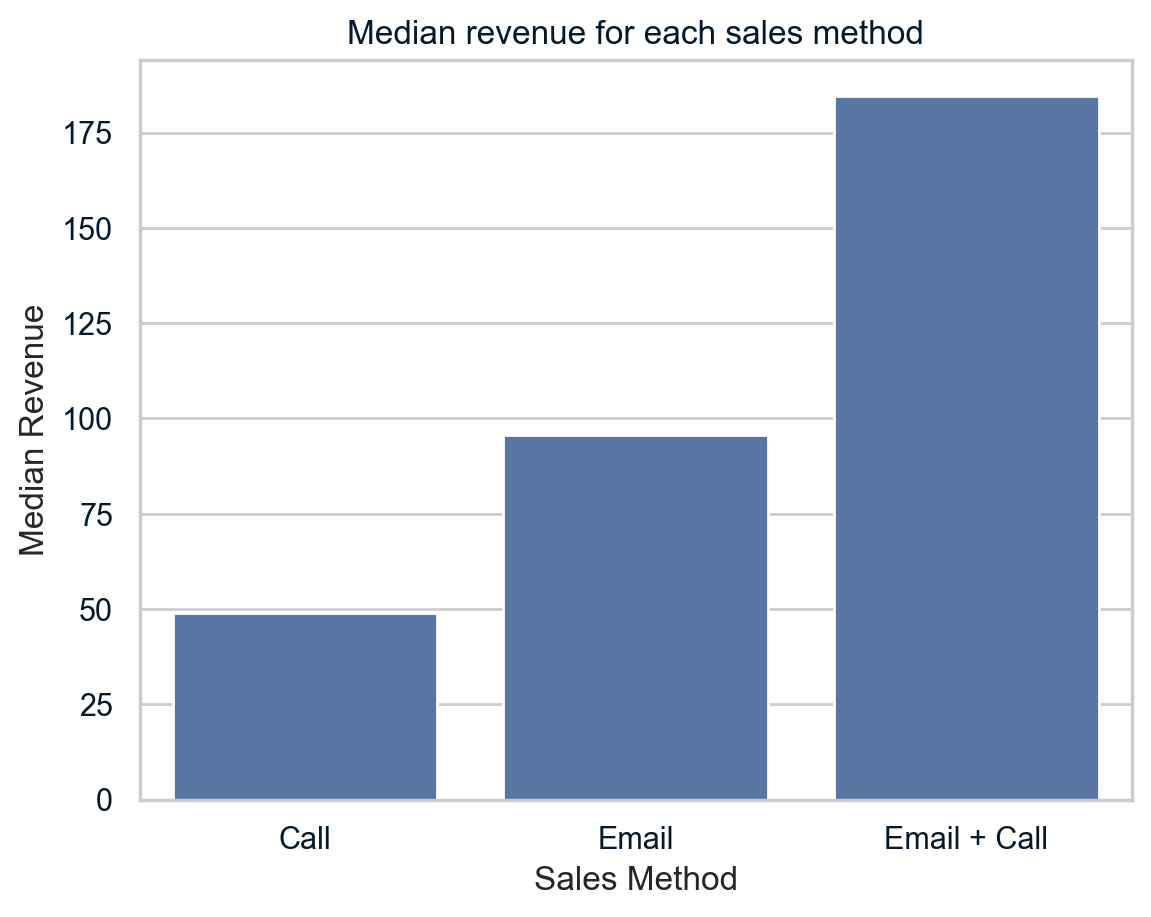

In [71]:
# Median revenue for each sales method
median_df = eda.groupby('sales_method')['revenue'].median()

# To display the resulting DataFrame
print(median_df)
# To display visualization
sns.barplot(data=median_df)
plt.title('Median revenue for each sales method')
plt.xlabel('Sales Method')
plt.ylabel('Median Revenue')
plt.show()

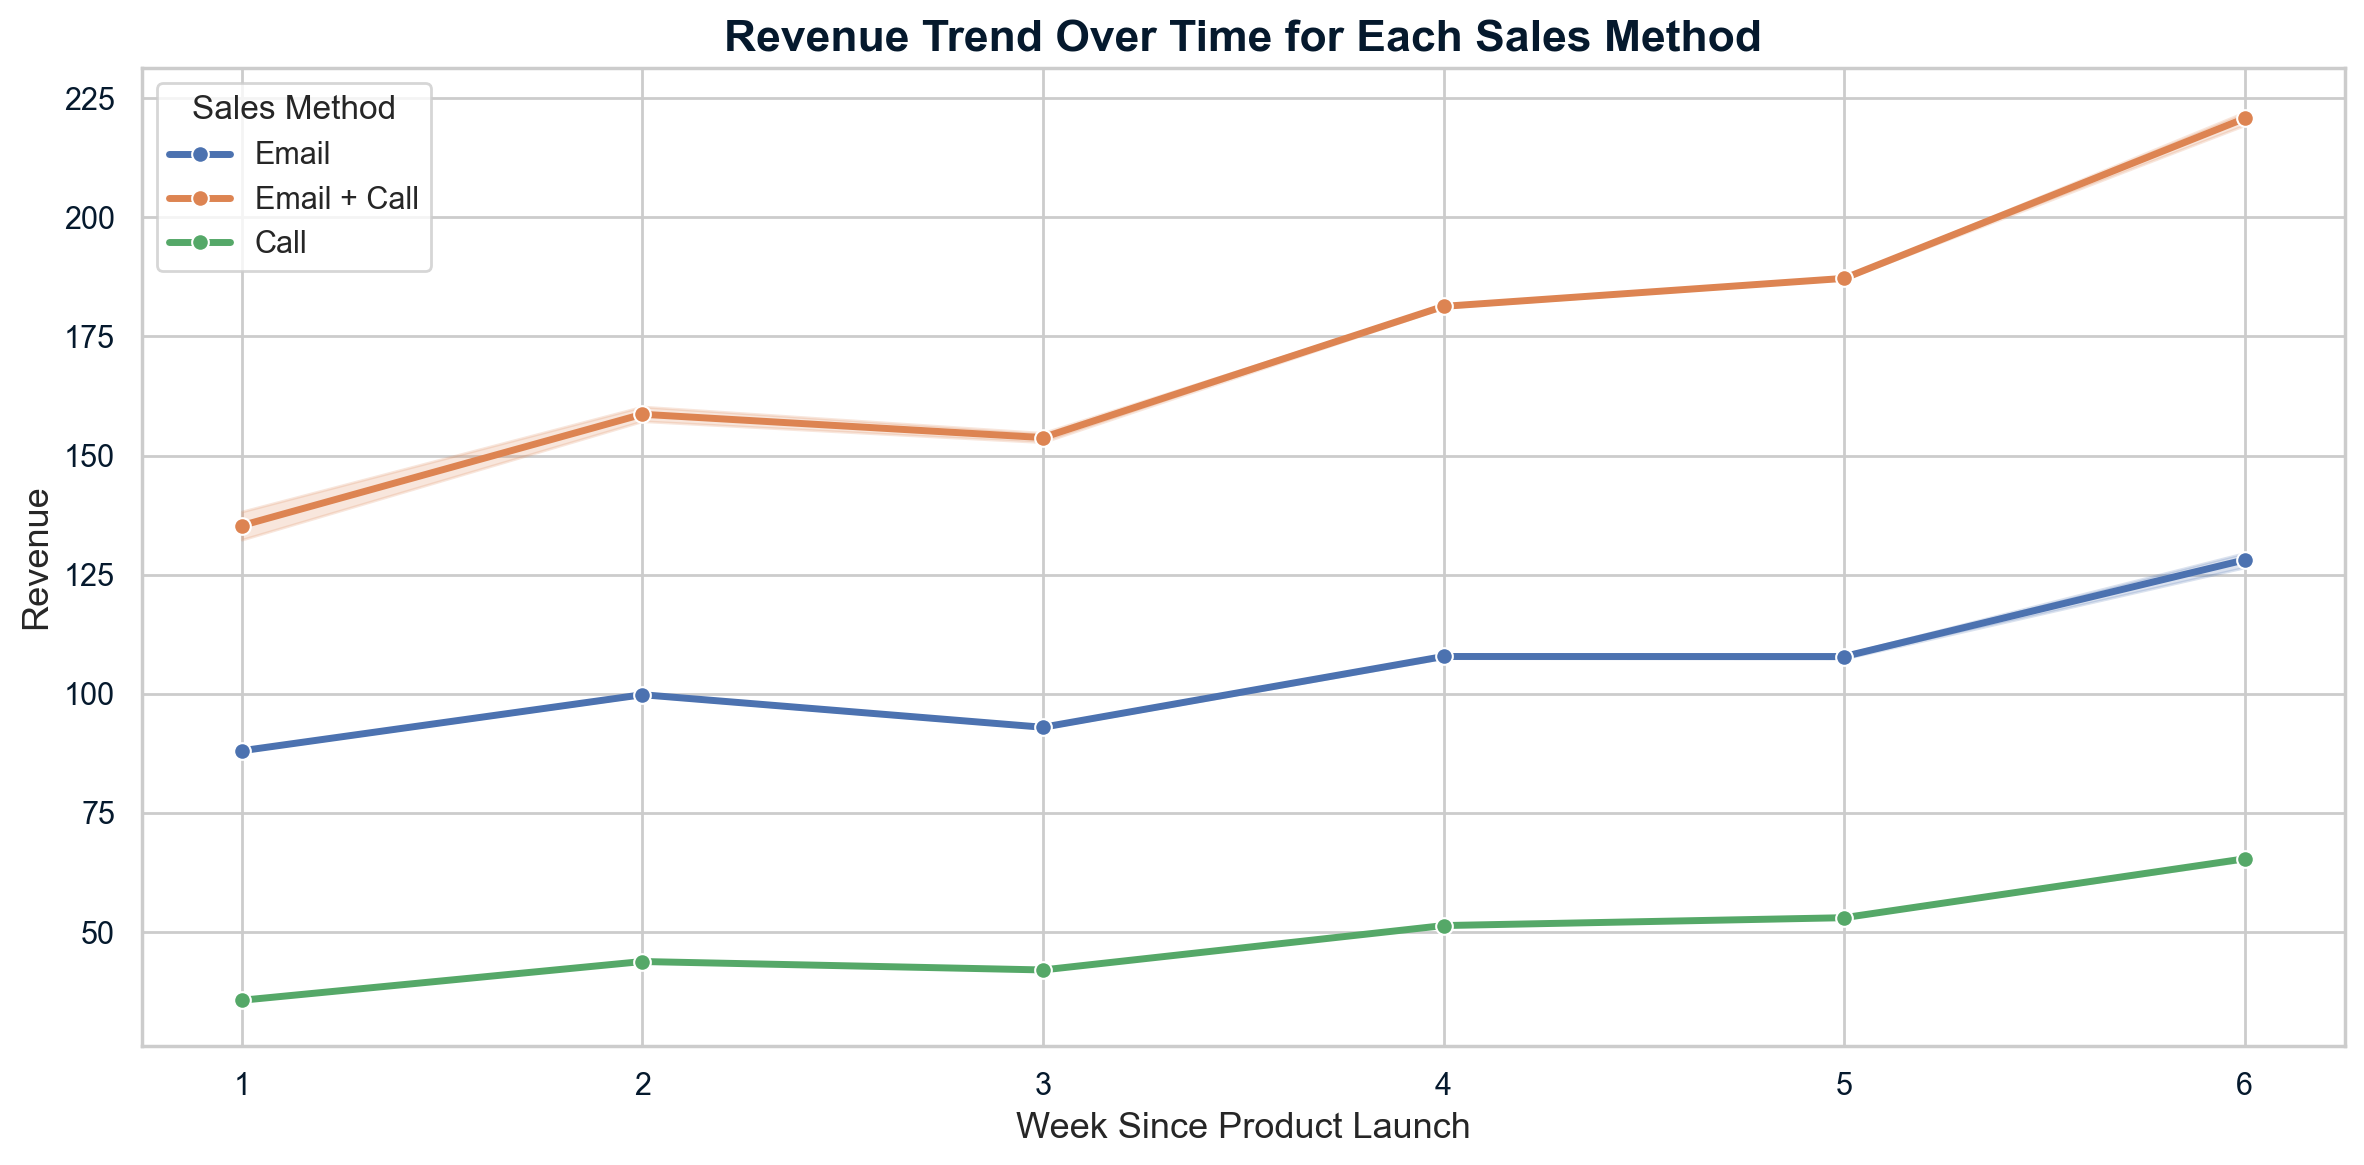

In [72]:
# To analyze the difference in revenue over time for each sales method, we can create line plots showing the trend of revenue over the weeks since the product launch

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=eda, 
    x='week', 
    y='revenue', 
    hue='sales_method', 
    marker='o',        
    linewidth=2.5      
)

plt.title('Revenue Trend Over Time for Each Sales Method', fontsize=16, fontweight='bold')
plt.xlabel('Week Since Product Launch', fontsize=13)
plt.ylabel('Revenue', fontsize=13)
plt.legend(title='Sales Method', title_fontsize='12', fontsize='11')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


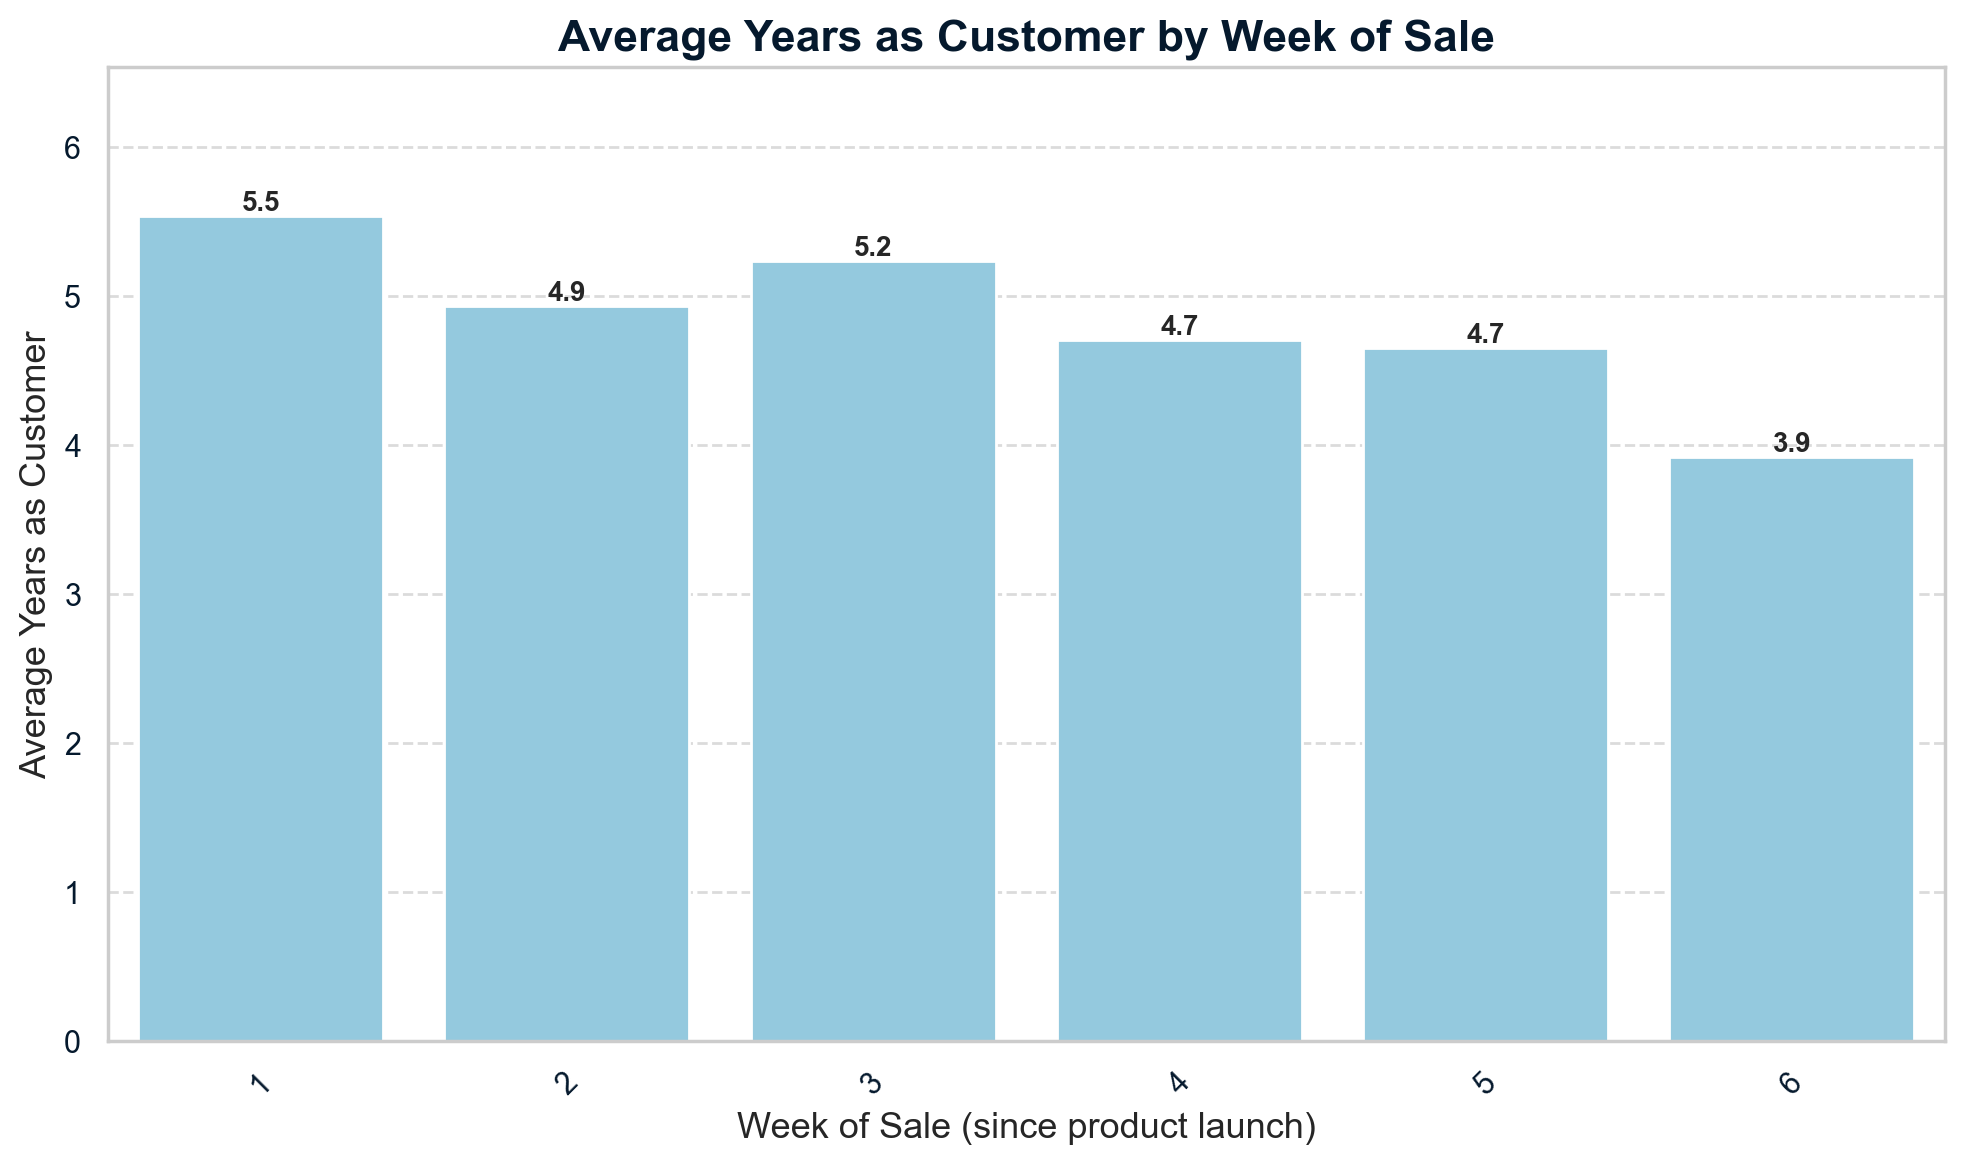

In [73]:
# Recalculate data
avg_years_by_week = eda.groupby('week').years_as_customer.mean().reset_index()
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=avg_years_by_week, x='week', y='years_as_customer', color='skyblue')
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{height:.1f}',
                     (bar.get_x() + bar.get_width() / 2, height),
                     ha='center', va='bottom',
                     fontsize=10, fontweight='bold')

plt.title('Average Years as Customer by Week of Sale', fontsize=16, fontweight='bold')
plt.xlabel('Week of Sale (since product launch)', fontsize=13)
plt.ylabel('Average Years as Customer', fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, avg_years_by_week['years_as_customer'].max() + 1)

plt.tight_layout()
plt.show()


In [74]:
# Calculate the correlation between week and years_as_customer
correlation = eda.week.corr(eda.years_as_customer)
# Print the correlation
print("Correlation between week and years_as_customer:", correlation)

Correlation between week and years_as_customer: -0.08268829695786738


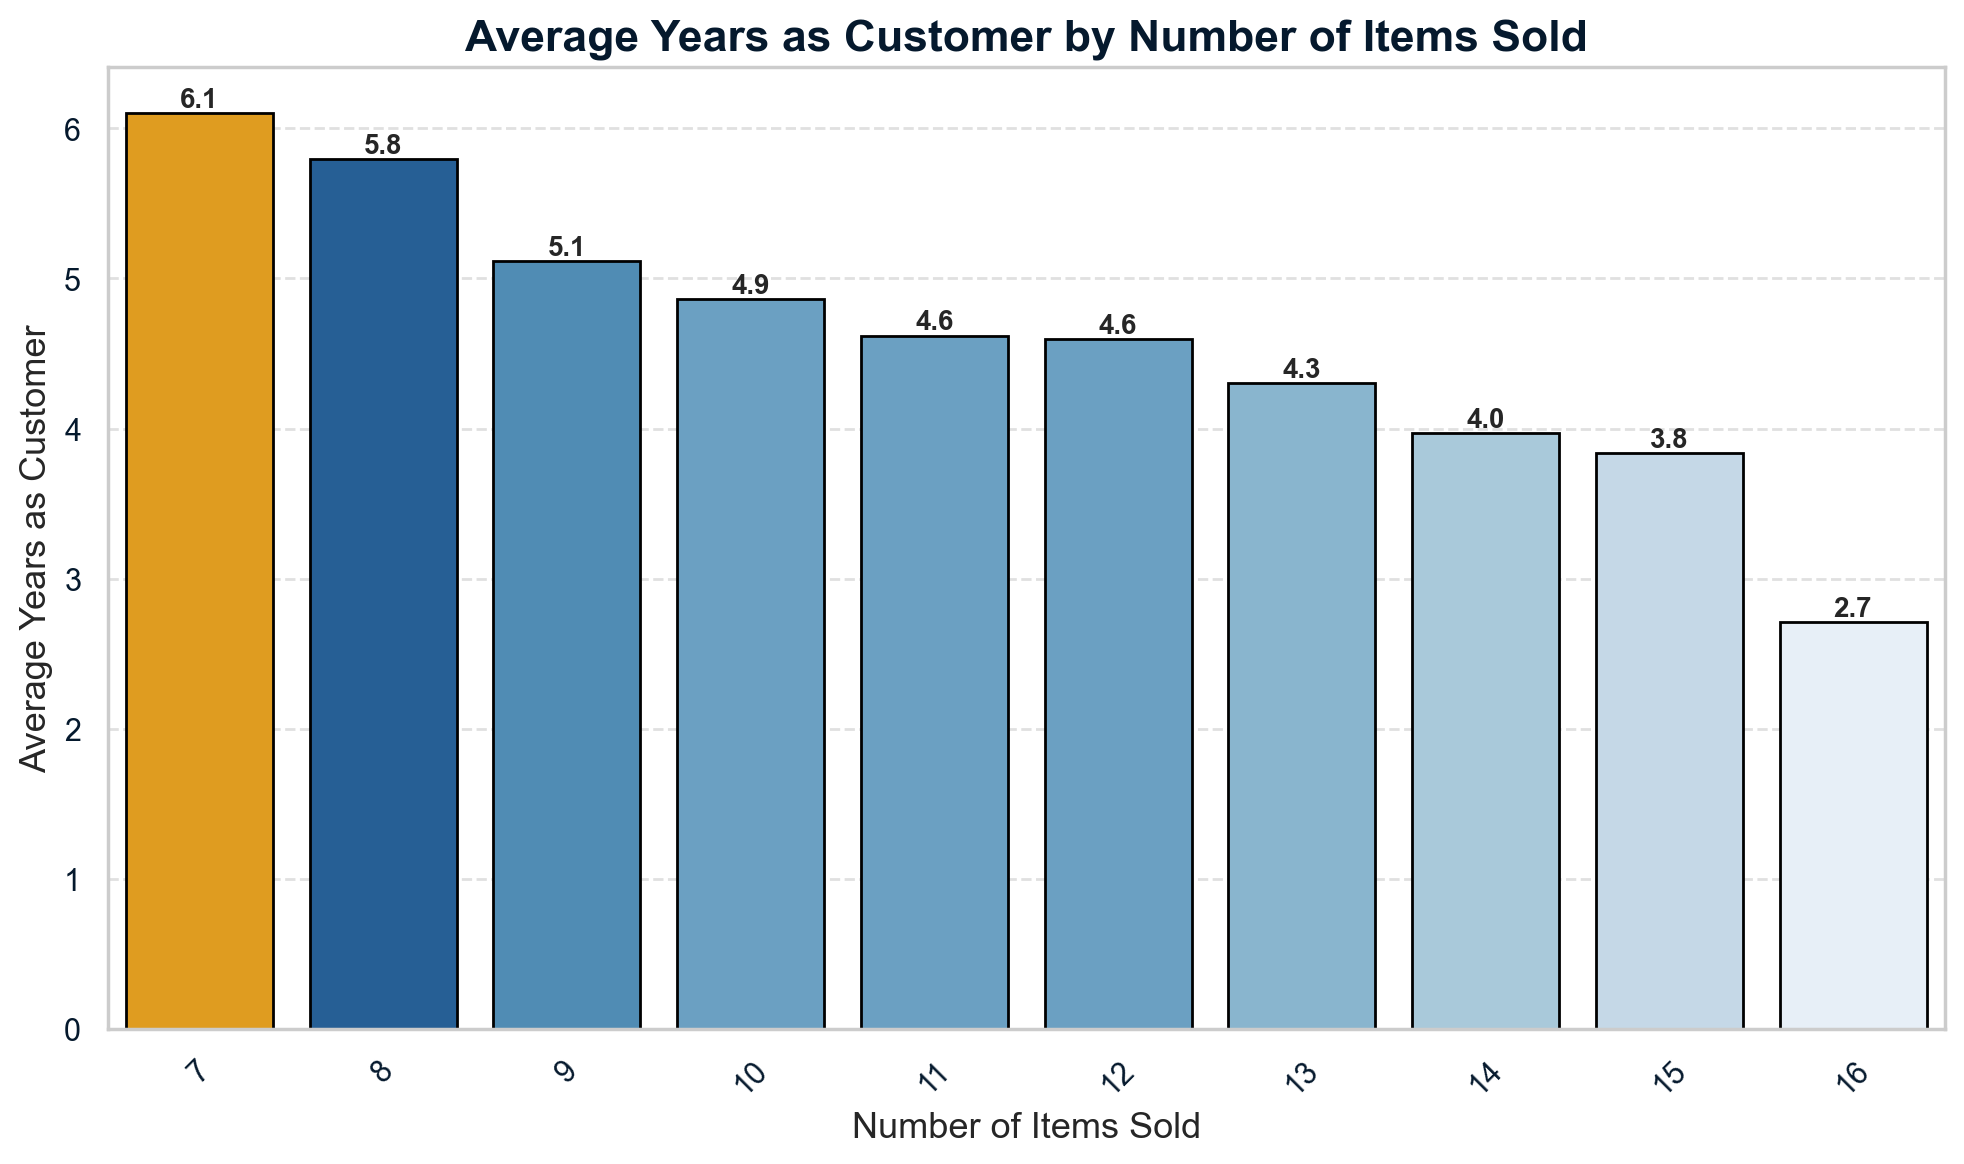

In [75]:
# Calculate the average years as customer for each nb_sold group

import numpy as np

avg_years_per_nb_sold = eda.groupby('nb_sold')['years_as_customer'].mean().reset_index()
avg_years_per_nb_sold = avg_years_per_nb_sold.sort_values(by='nb_sold')

norm = plt.Normalize(avg_years_per_nb_sold['years_as_customer'].min(), 
                     avg_years_per_nb_sold['years_as_customer'].max())
colors = sns.color_palette("Blues", n_colors=len(avg_years_per_nb_sold))
mapped_colors = [colors[int(norm(val) * (len(colors)-1))] for val in avg_years_per_nb_sold['years_as_customer']]

highlight_index = avg_years_per_nb_sold['years_as_customer'].idxmax()
highlight_color = 'orange'
bar_colors = [highlight_color if i == highlight_index else c for i, c in zip(avg_years_per_nb_sold.index, mapped_colors)]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=avg_years_per_nb_sold,
    x='nb_sold', y='years_as_customer',
    palette=bar_colors,
    edgecolor='black'
)

for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{height:.1f}',
                     (bar.get_x() + bar.get_width() / 2, height),
                     ha='center', va='bottom',
                     fontsize=10, fontweight='bold')

plt.title('Average Years as Customer by Number of Items Sold', fontsize=16, fontweight='bold')
plt.xlabel('Number of Items Sold', fontsize=13)
plt.ylabel('Average Years as Customer', fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend([],[], frameon=False)  # no legend needed

plt.show()


In [76]:
# To calculate the correlation between years_as_customer and nb_sold, you can use the corr() function in pandas.

# Calculate the correlation between years_as_customer and nb_sold
correlation = eda['years_as_customer'].corr(eda['nb_sold'])

# Print the correlation
print("Correlation between years_as_customer and nb_sold:", correlation)

Correlation between years_as_customer and nb_sold: -0.09972786463847658


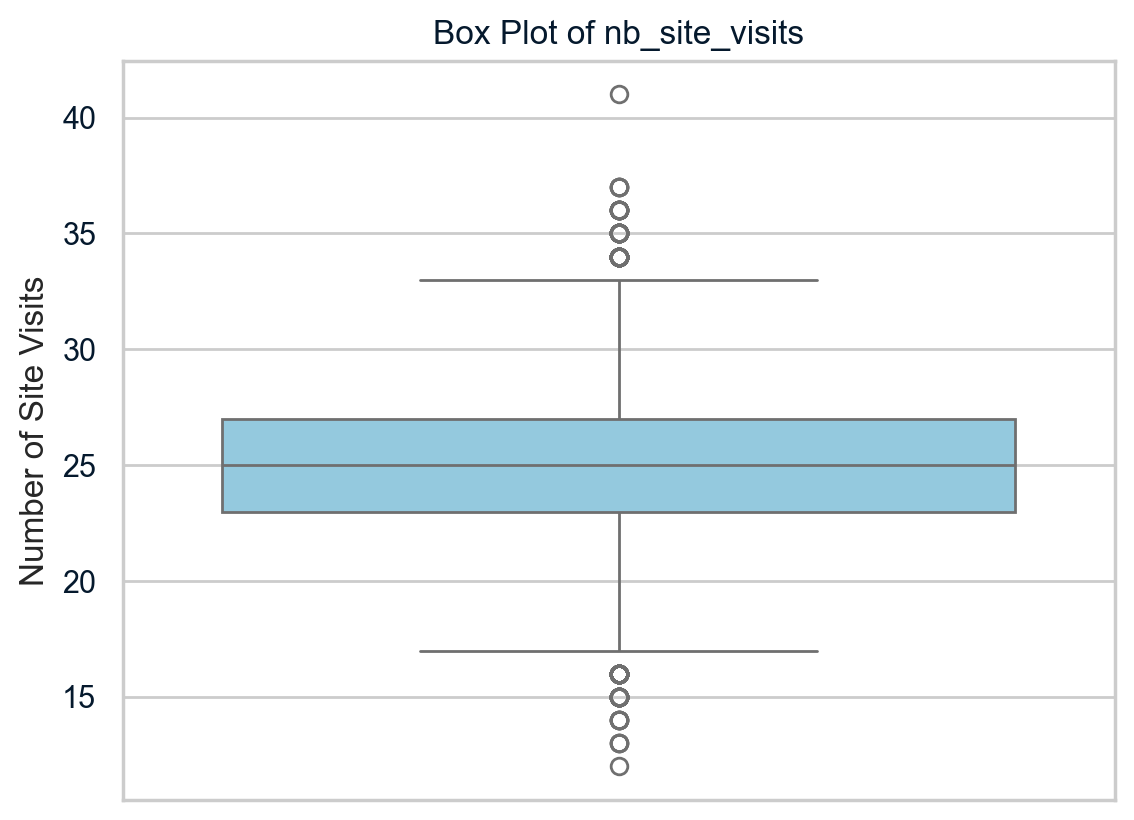

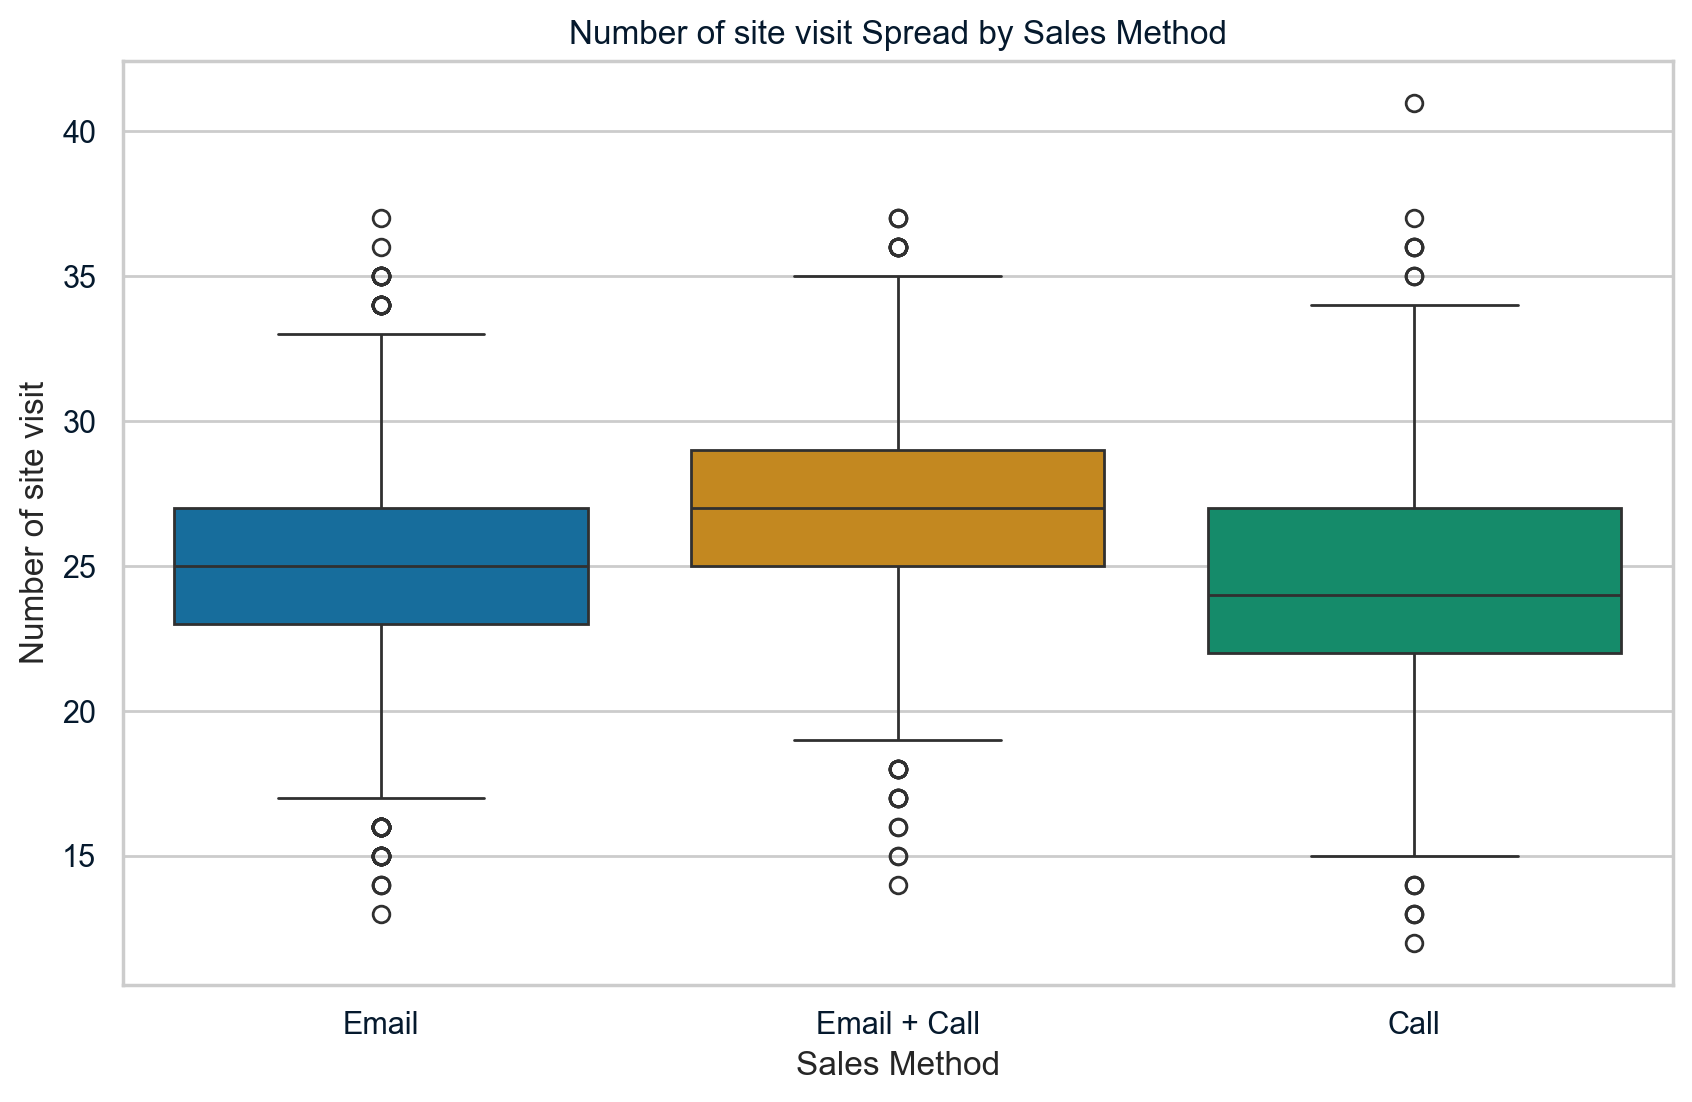

In [77]:
# Overall number of site visits

sns.boxplot(data=eda, y='nb_site_visits', color='skyblue')

plt.title('Box Plot of nb_site_visits')
plt.ylabel('Number of Site Visits')

plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=eda, x='sales_method', y='nb_site_visits', hue='sales_method', palette='colorblind')
plt.title('Number of site visit Spread by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of site visit')
plt.show()

In [78]:
# Count the number of customers who visited more than 40 times
num_customers_visited_more_than_40 = len(eda[eda['nb_site_visits'] > 40])

print("Number of customers who visited more than 40 times:", num_customers_visited_more_than_40)

Number of customers who visited more than 40 times: 1


In [79]:
# Group the data by state and sum the revenue for each state
revenue_by_state = eda.groupby('state')['revenue'].sum().reset_index()

# Sort the states based on their total revenue
revenue_by_state_sorted = revenue_by_state.sort_values(by='revenue', ascending=False)

# Get the top 5 states by revenue
top_5_states_by_revenue = revenue_by_state_sorted.head(5)

print("Top 5 states by revenue:")
print(top_5_states_by_revenue)

Top 5 states by revenue:
         state    revenue
4   California  176729.57
42       Texas  114691.45
31    New York   90651.87
8      Florida   86781.53
12    Illinois   57579.82


In [80]:
# Group by 'state' and count missing values in 'revenue' column
missing_values_by_state = eda[eda.revenue_category == 'Null'].groupby('state').size().reset_index(name='missing_count').sort_values(by = 'missing_count', ascending = False)
missing_values_by_state

,state,missing_count
4,California,133
42,Texas,78
8,Florida,78
31,New York,66
34,Ohio,46
37,Pennsylvania,45
12,Illinois,41
21,Michigan,32
41,Tennessee,32
29,New Jersey,32


In [81]:
# Group by 'state' and count missing values in 'revenue' column
missing_values_by_state = eda[eda.revenue_category == 'Null'].groupby('state').size().reset_index(name='missing_count')

# Calculate total records for each state
total_records_by_state = eda.groupby('state').size().reset_index(name='total_count')
# Merge the two DataFrames on 'state'
state = missing_values_by_state.merge(total_records_by_state, on='state')
# Calculate percentage of missing values for each state
state['percentage_missing'] = (state.missing_count/state.total_count)*100
state.sort_values(by = 'percentage_missing',ascending = False)

,state,missing_count,total_count,percentage_missing
7,Delaware,7,34,20.588235
33,North Dakota,5,30,16.666667
1,Alaska,5,40,12.500000
3,Arkansas,14,132,10.606061
28,New Hampshire,5,53,9.433962
47,West Virginia,8,85,9.411765
41,Tennessee,32,340,9.411765
15,Kansas,13,142,9.154930
8,Florida,78,904,8.628319
20,Massachusetts,24,294,8.163265


# Part III: Metric

Average Revenue per Customer Visit is a metric that measures the average amount of revenue generated by each visit to the company's website. It helps in understanding the effectiveness of the company's online sales strategy and the value derived from each interaction with customers on the website.

How to Use the Metric:

- Monitor Trends: Track the average revenue per customer visit over time to identify trends and patterns. Increasing trends may indicate improvements in online sales strategies or customer engagement, while decreasing trends may signal areas for improvement.

- Benchmarking: Compare the average revenue per visit against industry benchmarks or competitors' performance to assess the company's competitiveness and identify areas for improvement.

- Performance Evaluation: Use the metric to evaluate the effectiveness of marketing campaigns, website optimizations, or changes in sales strategies. Identify high-performing periods and factors contributing to success.

In [82]:
total_revenue = eda['revenue'].sum()
total_visits = eda['nb_site_visits'].sum()
average_revenue_per_visit = total_revenue / total_visits
print("Initial Average Revenue per Visit:", average_revenue_per_visit)

Initial Average Revenue per Visit: 3.824152241657151


==> By segmenting it by different sales methods, it provides insights into the effectiveness of each of these in converting website visits into revenue and helps identify which sales methods are most successful in driving revenue per visit.

In [83]:
# Calculate total revenue and total visits for each sales method
total_revenue_by_method = eda.groupby('sales_method')['revenue'].sum()
total_visits_by_method = eda.groupby('sales_method')['nb_site_visits'].sum()

# Calculate average revenue per visit for each sales method
average_revenue_per_visit_by_method = total_revenue_by_method / total_visits_by_method
print("Initial Average Revenue per Visit (by Sales Method):")
print(average_revenue_per_visit_by_method)

Initial Average Revenue per Visit (by Sales Method):
sales_method
Call            1.951001
Email           3.919088
Email + Call    6.865501
dtype: float64


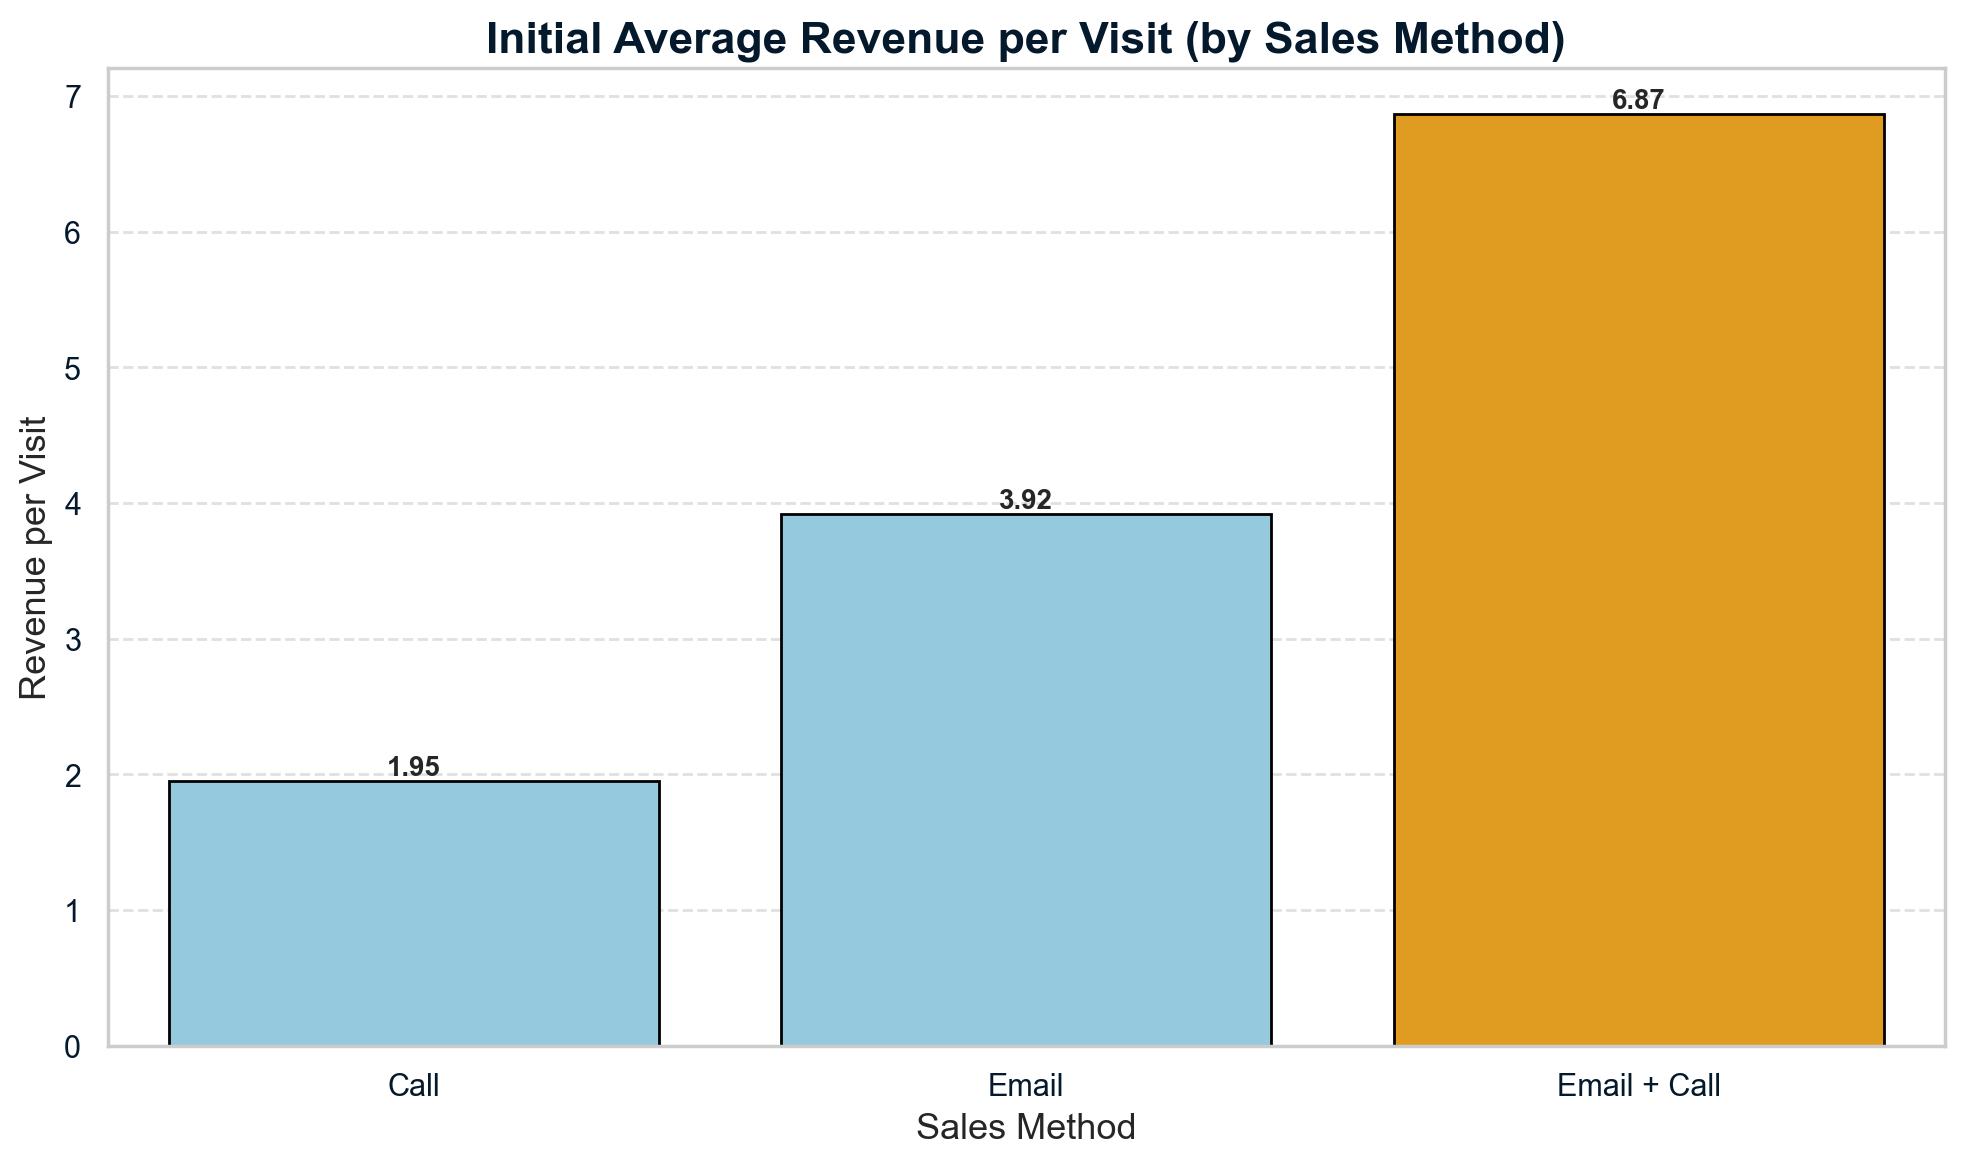

In [84]:
# Convert Series to DataFrame
average_revenue_df = average_revenue_per_visit_by_method.reset_index()
average_revenue_df.columns = ['sales_method', 'revenue_per_visit']

# Identify top performer
top_idx = average_revenue_df['revenue_per_visit'].idxmax()

# Set colors: highlight top method in orange
bar_colors = ['skyblue' if i != top_idx else 'orange' for i in range(len(average_revenue_df))]

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=average_revenue_df,
    x='sales_method', y='revenue_per_visit',
    palette=bar_colors,
    edgecolor='black'
)

# Add bar value labels
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{height:.2f}',
                     (bar.get_x() + bar.get_width() / 2, height),
                     ha='center', va='bottom',
                     fontsize=10, fontweight='bold')

# Style the plot
plt.title('Initial Average Revenue per Visit (by Sales Method)', fontsize=16, fontweight='bold')
plt.xlabel('Sales Method', fontsize=13)
plt.ylabel('Revenue per Visit', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend([], [], frameon=False)

plt.show()


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation